In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('./RTA Dataset.csv')
df = data.copy()
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [15]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['year'], palette="Set2")
plt.title("Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

KeyError: 'year'

<Figure size 1000x500 with 0 Axes>

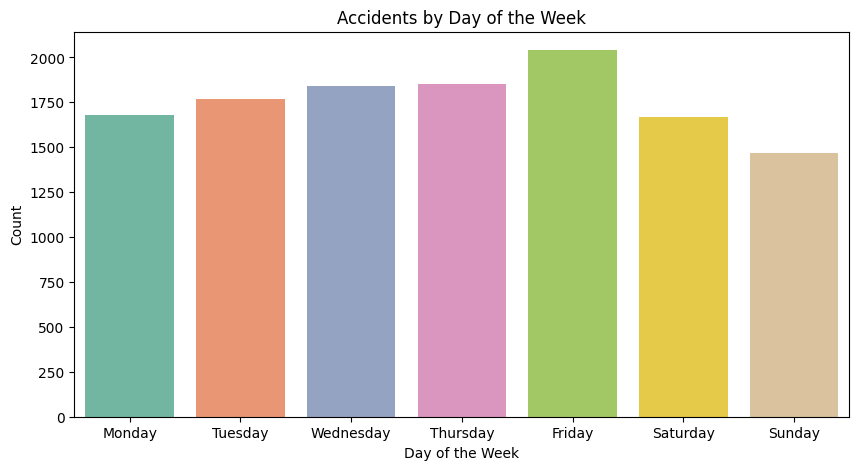

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

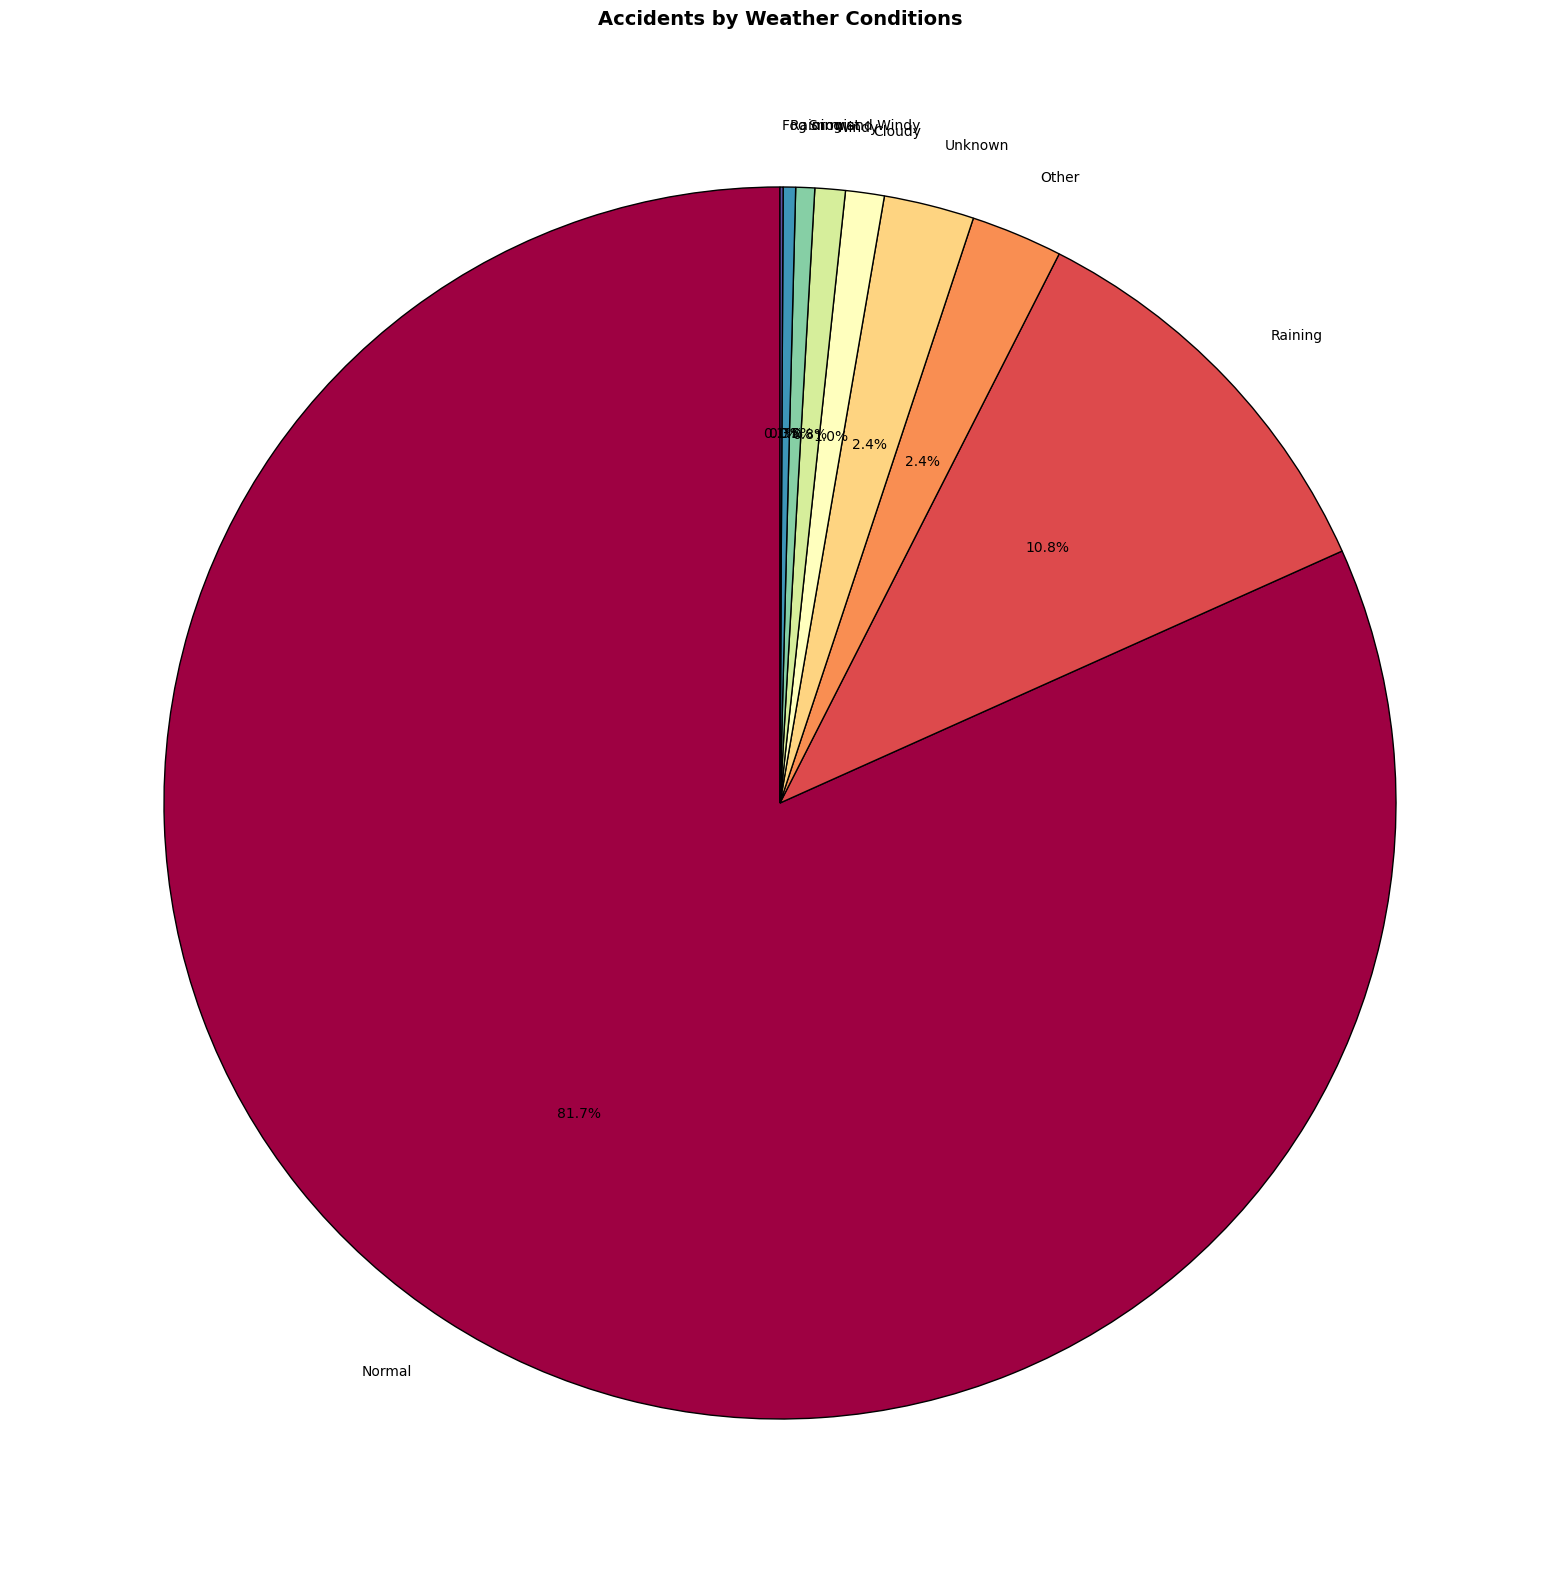

In [21]:
plt.figure(figsize=(20, 20))
df['Weather_conditions'].value_counts().plot.pie(autopct="%1.1f%%", cmap="Spectral", startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Accidents by Weather Conditions", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['region'], order=df['region'].value_counts().index, palette="magma")
plt.title("Accidents by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

KeyError: 'region'

<Figure size 1000x600 with 0 Axes>

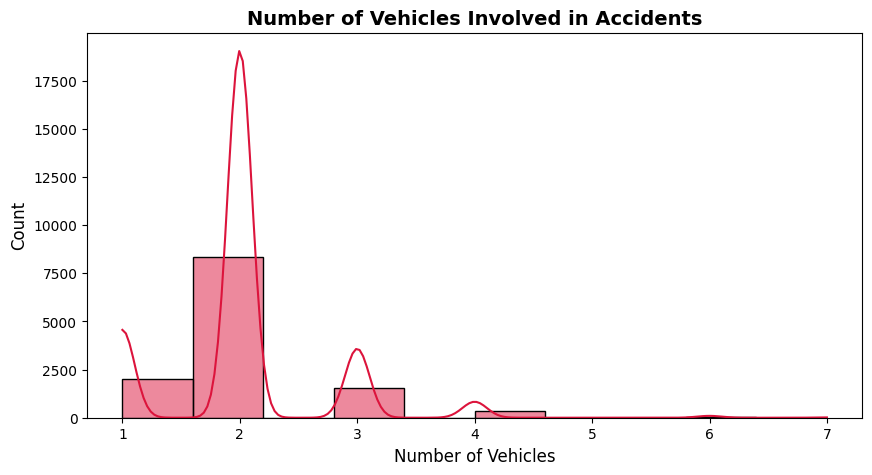

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Number_of_vehicles_involved'], bins=10, kde=True, color="crimson")  
plt.title("Number of Vehicles Involved in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Number of Vehicles", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Speed_limit'], bins=15, kde=True, color="blue")
plt.title("Accidents by Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.show()

KeyError: 'Speed_limit'

<Figure size 1000x500 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Urban/Rural"], palette="Set1")
plt.title("Accidents in Urban vs Rural Areas", fontsize=14, fontweight='bold')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

KeyError: 'Urban/Rural'

<Figure size 1000x500 with 0 Axes>

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Visibility_level"], palette="Spectral")
plt.title("Visibility Level Distribution in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Visibility Level", fontsize=12)
plt.show()

KeyError: 'Visibility_level'

<Figure size 1000x500 with 0 Axes>

In [36]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Accident_severity"], y=df["Emergency_response_time"], palette="Dark2")
plt.title("Emergency Response Time by Accident Severity", fontsize=14, fontweight='bold')
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Response Time (Minutes)", fontsize=12)
plt.show()

KeyError: 'Emergency_response_time'

<Figure size 1000x500 with 0 Axes>

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Number_of_injuries"], y=df["Economic_loss"], alpha=0.7, color="darkviolet")
plt.title("Injuries vs Economic Loss", fontsize=14, fontweight='bold')
plt.xlabel("Number of Injuries", fontsize=12)
plt.ylabel("Economic Loss ($)", fontsize=12)
plt.show()

KeyError: 'Number_of_injuries'

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Accident Severity"], y=df["Driver Alcohol Level"], palette="Dark2")
plt.title("Alcohol Level by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Driver Alcohol Level")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Driver Fatigue"], palette="Set3")
plt.title("Fatigue Involvement in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Driver Fatigue (1=Yes, 0=No)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Traffic Volume'], shade=True, color="orangered")
plt.title("Traffic Volume Density in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Traffic Volume", fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df["Accident Cause"], order=df["Accident Cause"].value_counts().index, palette="magma")
plt.title("Accidents by Cause")
plt.xlabel("Count")
plt.ylabel("Accident Cause")
plt.show()